In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'train.csv.zip']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, log_loss
import operator
import json
from IPython import display
import os
import warnings

np.random.seed(0)
warnings.filterwarnings("ignore")
THRESHOLD = 4

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd

In [6]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [7]:
train.shape

(355, 99)

In [8]:
train.head()

,PhoneId,Also Known As,Applications,Architecture,Aspect Ratio,Audio Features,Audio Jack,Autofocus,Bezel-less display,Bluetooth,...,Video Recording,Video Recording Features,VoLTE,Waterproof,Weight,Wi-Fi,Wi-Fi Features,Width,Wireless Charging,Rating
0,0,NaN,NaN,64 bit,19:9,NaN,3.5 mm,Phase Detection autofocus,yes,v5.0,...,1920x1080 @ 30 fps,NaN,yes,NaN,182 grams Below Average ▾Weight compared to11 ...,"Wi-Fi 802.11, a/b/g/n","Wi-Fi Direct, Mobile Hotspot",76.4 mm,NaN,4.5
1,1,NaN,Oppo Browser,64 bit,19:9,NaN,3.5 mm,Phase Detection autofocus,yes,v4.2,...,1920x1080 @ 30 fps,NaN,yes,NaN,168 grams Average ▾Weight compared to8 - 12 K ...,"Wi-Fi 802.11, b/g/n",Mobile Hotspot,75.6 mm,NaN,4.5
2,2,NaN,NaN,64 bit,19.5:9,NaN,3.5 mm,yes,yes,v4.2,...,NaN,NaN,yes,NaN,168 grams Average ▾Weight compared to10 - 14 K...,"Wi-Fi 802.11, b/g/n",Mobile Hotspot,74 mm,NaN,4.4
3,4,NaN,NaN,64 bit,18.5:9,Dolby Atmos,3.5 mm,No,yes,v5.0,...,1920x1080 @ 30 fps,NaN,yes,NaN,169 grams Average ▾Weight compared to15 - 23 K...,"Wi-Fi 802.11, a/ac/b/g/n","Wi-Fi Direct, Mobile Hotspot",76.8 mm,NaN,4.3
4,5,NaN,NaN,64 bit,19.5:9,NaN,3.5 mm,Phase Detection autofocus,yes,v4.2,...,1920x1080 @ 60 fps,NaN,yes,NaN,175 grams Below Average ▾Weight compared to12 ...,"Wi-Fi 802.11, a/ac/b/g/n",Mobile Hotspot,76.6 mm,NaN,4.4


In [9]:
test.shape

(119, 98)

In [10]:
train.shape

(355, 99)

In [11]:
print("Total columns in train dataset are %d", train.shape[1])
print("Total rows in train dataset are %d", train.shape[0])


Total columns in train dataset are %d 99
Total rows in train dataset are %d 355


In [12]:
print("Total rows in train dataset are %d", train.shape[0])
print("Total columns in train dataset are", train.shape[1])

Total rows in train dataset are %d 355
Total columns in train dataset are 99


In [13]:
def data_clean(data):
    
    # Let's first remove all missing value features
    columns_to_remove = ['Also Known As','Applications','Audio Features','Bezel-less display'
                         'Browser','Build Material','Co-Processor','Browser'
                         'Display Colour','Mobile High-Definition Link(MHL)',
                         'Music', 'Email','Fingerprint Sensor Position',
                         'Games','HDMI','Heart Rate Monitor','IRIS Scanner', 
                         'Optical Image Stabilisation','Other Facilities',
                         'Phone Book','Physical Aperture','Quick Charging',
                         'Ring Tone','Ruggedness','SAR Value','SIM 3','SMS',
                         'Screen Protection','Screen to Body Ratio (claimed by the brand)',
                         'Sensor','Software Based Aperture', 'Special Features',
                         'Standby time','Stylus','TalkTime', 'USB Type-C',
                         'Video Player', 'Video Recording Features','Waterproof',
                         'Wireless Charging','USB OTG Support', 'Video Recording','Java']

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    #Features having very low variance 
    columns_to_remove = ['Architecture','Audio Jack','GPS','Loudspeaker','Network','Network Support','VoLTE']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    # Multivalued:
    columns_to_remove = ['Architecture','Launch Date','Audio Jack','GPS','Loudspeaker','Network','Network Support','VoLTE', 'Custom UI']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    # Not much important
    columns_to_remove = ['Bluetooth', 'Settings','Wi-Fi','Wi-Fi Features']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]
    
    return data

In [14]:
train = data_clean(train)
test = data_clean(test)

In [15]:
train.head()
test.head()

,Processor,USB Connectivity,Fingerprint Sensor,Screen Size,Aspect Ratio,Internal Memory,FM Radio,NFC,Autofocus,SIM Slot(s),...,Bezel-less display,Touch Screen,SIM 2,Pixel Density,User Available Storage,Thickness,PhoneId,Other Sensors,Capacity,Expandable Memory
0,"Octa core, 1.8 GHz, Cortex A53 Average ▾Proces...","Mass storage device, USB charging, microUSB 2.0",No,6.2 inches (15.75 cm),19:9,16 GB Very Good ▾Internal Memory compared to6 ...,yes,No,Phase Detection autofocus,"Dual SIM, GSM+GSM, Dual VoLTE",...,yes,"Capacitive Touchscreen, Multi-touch",4G Bands: TD-LTE 2600(band 38) / 2300(band 40)...,271 ppi Good ▾Pixel Density compared to6 - 8 K...,Up to 8.67 GB,8.2 mm Very Good ▾Thickness compared to6 - 8 K...,3,"Light sensor, Proximity sensor, Accelerometer,...",4230 mAh,Up to 256 GB
1,"Octa core (1.8 GHz, Quad core, Kryo 260 + 1.6 ...","Mass storage device, USB charging",yes,6.2 inches (15.75 cm),19:9,64 GB Best in Class ▾Internal Memory compared ...,yes,No,Phase Detection autofocus,"Dual SIM, GSM+GSM, Dual VoLTE",...,yes,"Capacitive Touchscreen, Multi-touch",4G Bands: TD-LTE 2600(band 38) / 2300(band 40)...,402 ppi Best in Class ▾Pixel Density compared ...,NaN,8.9 mm Good ▾Thickness compared to12 - 18 K Ph...,11,"Light sensor, Proximity sensor, Accelerometer,...",5000 mAh,Up to 256 GB
2,"Octa core (2 GHz, Quad core, Cortex A73 + 2 GH...","Mass storage device, USB charging, microUSB 2.0",yes,6.3 inches (16 cm),19.5:9,64 GB Best in Class ▾Internal Memory compared ...,yes,No,yes,"Dual SIM, GSM+GSM, Dual VoLTE",...,yes,"Capacitive Touchscreen, Multi-touch",4G Bands: TD-LTE 2600(band 38) / 2300(band 40)...,409 ppi Best in Class ▾Pixel Density compared ...,Up to 48.6 GB,8 mm Very Good ▾Thickness compared to16 - 24 K...,13,"Light sensor, Proximity sensor, Accelerometer,...",3500 mAh,Up to 256 GB
3,"Octa core (2 GHz, Quad core, Cortex A73 + 2 GH...","Mass storage device, USB charging, microUSB 2.0",yes,6.3 inches (16 cm),19.5:9,64 GB Best in Class ▾Internal Memory compared ...,yes,No,yes,"Dual SIM, GSM+GSM, Dual VoLTE",...,yes,"Capacitive Touchscreen, Multi-touch",4G Bands: TD-LTE 2600(band 38) / 2300(band 40)...,409 ppi Best in Class ▾Pixel Density compared ...,NaN,8 mm Very Good ▾Thickness compared to13 - 19 K...,16,"Light sensor, Proximity sensor, Accelerometer,...",3500 mAh,Up to 256 GB
4,"Octa core (1.8 GHz, Quad core, Kryo 260 + 1.6 ...","Mass storage device, USB charging, microUSB 2.0",yes,5.99 inches (15.21 cm),18:9,64 GB Best in Class ▾Internal Memory compared ...,NaN,No,Phase Detection autofocus,"Dual SIM, GSM+GSM, Dual VoLTE",...,yes,"Capacitive Touchscreen, Multi-touch",4G Bands: TD-LTE 2300(band 40) / 2500(band 41)...,403 ppi Best in Class ▾Pixel Density compared ...,Up to 52.4 GB,8 mm Very Good ▾Thickness compared to10 - 16 K...,19,"Light sensor, Proximity sensor, Accelerometer,...",4000 mAh,Up to 128 GB


In [16]:
train = train[(train.isnull().sum(axis=1) <= 15)]

In [18]:
#checking the number of features and rows in train after data cleaning
print("Number of rows in train:",train.shape[0])
print("Number of columns in train:",train.shape[1])

Number of rows in train: 341
Number of columns in train: 47


In [19]:
#checking the number of features and rows in test after data cleaning
print("Number of rows in test:",test.shape[0])
print("Number of columns in test:",test.shape[1])

Number of rows in test: 119
Number of columns in test: 46


In [20]:
def for_integer(test):
    try:
        test = test.strip()
        return int(test.split(' ')[0])
    except IOError:
           pass
    except ValueError:
        pass
    except:
        pass

def for_string(test):
    try:
        test = test.strip()
        return (test.split(' ')[0])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass

def for_float(test):
    try:
        test = test.strip()
        return float(test.split(' ')[0])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass
def find_freq(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[2][0] == '(':
            return float(test[2][1:])
        return float(test[2])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass

    
def for_Internal_Memory(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[1] == 'GB':
            return int(test[0])
        if test[1] == 'MB':
#             print("here")
            return (int(test[0]) * 0.001)
    except IOError:
           pass
    except ValueError:
        pass
    except:
        pass
    
def find_freq(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[2][0] == '(':
            return float(test[2][1:])
        return float(test[2])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass


In [21]:
def data_clean_2(x):
    data = x.copy()
    
    data['Capacity'] = data['Capacity'].apply(for_integer)

    data['Height'] = data['Height'].apply(for_float)
    data['Height'] = data['Height'].fillna(data['Height'].mean())

    data['Internal Memory'] = data['Internal Memory'].apply(for_Internal_Memory)

    data['Pixel Density'] = data['Pixel Density'].apply(for_integer)

    data['Internal Memory'] = data['Internal Memory'].fillna(data['Internal Memory'].median())
    data['Internal Memory'] = data['Internal Memory'].astype(int)

    data['RAM'] = data['RAM'].apply(for_integer)
    data['RAM'] = data['RAM'].fillna(data['RAM'].median())
    data['RAM'] = data['RAM'].astype(int)

    data['Resolution'] = data['Resolution'].apply(for_integer)
    data['Resolution'] = data['Resolution'].fillna(data['Resolution'].median())
    data['Resolution'] = data['Resolution'].astype(int)

    data['Screen Size'] = data['Screen Size'].apply(for_float)

    data['Thickness'] = data['Thickness'].apply(for_float)
    data['Thickness'] = data['Thickness'].fillna(data['Thickness'].mean())
    data['Thickness'] = data['Thickness'].round(2)

    data['Type'] = data['Type'].fillna('Li-Polymer')

    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].apply(for_float)
    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].fillna(data['Screen to Body Ratio (calculated)'].mean())
    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].round(2)

    data['Width'] = data['Width'].apply(for_float)
    data['Width'] = data['Width'].fillna(data['Width'].mean())
    data['Width'] = data['Width'].round(2)

    data['Flash'][data['Flash'].isna() == True] = "Other"

    data['User Replaceable'][data['User Replaceable'].isna() == True] = "Other"

    data['Num_cores'] = data['Processor'].apply(for_string)
    data['Num_cores'][data['Num_cores'].isna() == True] = "Other"


    data['Processor_frequency'] = data['Processor'].apply(find_freq)
    #because there is one entry with 208MHz values, to convert it to GHz
    data['Processor_frequency'][data['Processor_frequency'] > 200] = 0.208
    data['Processor_frequency'] = data['Processor_frequency'].fillna(data['Processor_frequency'].mean())
    data['Processor_frequency'] = data['Processor_frequency'].round(2)

    data['Camera Features'][data['Camera Features'].isna() == True] = "Other"

    #simplifyig Operating System to os_name for simplicity
    data['os_name'] = data['Operating System'].apply(for_string)
    data['os_name'][data['os_name'].isna() == True] = "Other"

    data['Sim1'] = data['SIM 1'].apply(for_string)

    data['SIM Size'][data['SIM Size'].isna() == True] = "Other"

    data['Image Resolution'][data['Image Resolution'].isna() == True] = "Other"

    data['Fingerprint Sensor'][data['Fingerprint Sensor'].isna() == True] = "Other"

    data['Expandable Memory'][data['Expandable Memory'].isna() == True] = "No"

    data['Weight'] = data['Weight'].apply(for_integer)
    data['Weight'] = data['Weight'].fillna(data['Weight'].mean())
    data['Weight'] = data['Weight'].astype(int)

    data['SIM 2'] = data['SIM 2'].apply(for_string)
    data['SIM 2'][data['SIM 2'].isna() == True] = "Other"
    
    return data

In [22]:
train = data_clean_2(train)
test = data_clean_2(test)

# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 341
Number of features in train: 51
Number of data points in test: 119
Number of features in test: 50


In [23]:
def data_clean_3(x):
    
    data = x.copy()

    columns_to_remove = ['User Available Storage','SIM Size','Chipset','Processor','Autofocus','Aspect Ratio','Touch Screen',
                        'Bezel-less display','Operating System','SIM 1','USB Connectivity','Other Sensors','Graphics','FM Radio',
                        'NFC','Shooting Modes','Browser','Display Colour' ]

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]


    columns_to_remove = [ 'Screen Resolution','User Replaceable','Camera Features',
                        'Thickness', 'Display Type']

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]


    columns_to_remove = ['Fingerprint Sensor', 'Flash', 'Rating Count', 'Review Count','Image Resolution','Type','Expandable Memory',\
                        'Colours','Width','Model']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    return data

In [24]:
train = data_clean_3(train)
test = data_clean_3(test)

# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 341
Number of features in train: 18
Number of data points in test: 119
Number of features in test: 17


In [25]:
# one hot encoding

train_ids = train['PhoneId']
test_ids = test['PhoneId']

cols = list(test.columns)
cols.remove('PhoneId')
cols.insert(0, 'PhoneId')

combined = pd.concat([train.drop('Rating', axis=1)[cols], test[cols]])
print(combined.shape)
print(combined.columns)

combined = pd.get_dummies(combined)
print(combined.shape)
print(combined.columns)

train_new = combined[combined['PhoneId'].isin(train_ids)]
test_new = combined[combined['PhoneId'].isin(test_ids)]

(460, 17)
Index(['PhoneId', 'Height', 'Processor_frequency', 'SIM 2', 'Resolution',
       'Screen to Body Ratio (calculated)', 'Pixel Density', 'Screen Size',
       'Capacity', 'os_name', 'RAM', 'Internal Memory', 'Weight',
       'SIM Slot(s)', 'Sim1', 'Brand', 'Num_cores'],
      dtype='object')
(460, 87)
Index(['PhoneId', 'Height', 'Processor_frequency', 'Resolution',
       'Screen to Body Ratio (calculated)', 'Pixel Density', 'Screen Size',
       'Capacity', 'RAM', 'Internal Memory', 'Weight', 'SIM 2_2G', 'SIM 2_3G',
       'SIM 2_4G', 'SIM 2_Other', 'os_name_Android', 'os_name_Blackberry',
       'os_name_KAI', 'os_name_Nokia', 'os_name_Other', 'os_name_Tizen',
       'os_name_iOS', 'SIM Slot(s)_Dual SIM, GSM+CDMA',
       'SIM Slot(s)_Dual SIM, GSM+GSM',
       'SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE',
       'SIM Slot(s)_Single SIM, GSM', 'Sim1_2G', 'Sim1_3G', 'Sim1_4G',
       'Brand_10.or', 'Brand_Apple', 'Brand_Asus', 'Brand_Billion',
       'Brand_Blackberry', 'Brand_

In [26]:
train_new = train_new.merge(train[['PhoneId', 'Rating']], on='PhoneId')

In [27]:
# check the number of features and data points in train
print("Number of data points in train: %d" % train_new.shape[0])
print("Number of features in train: %d" % train_new.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test_new.shape[0])
print("Number of features in test: %d" % test_new.shape[1])

Number of data points in train: 341
Number of features in train: 88
Number of data points in test: 119
Number of features in test: 87


In [28]:
train_new.head()

,PhoneId,Height,Processor_frequency,Resolution,Screen to Body Ratio (calculated),Pixel Density,Screen Size,Capacity,RAM,Internal Memory,...,Brand_iVooMi,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Rating
0,0,157.9,1.8,20,80.68,403,6.26,4000,4,64,...,0,0,0,0,0,1,0,0,0,4.5
1,1,156.2,1.8,8,80.85,271,6.20,4230,3,32,...,0,0,0,0,0,1,0,0,0,4.5
2,2,157.0,2.1,25,83.68,409,6.30,3500,3,32,...,0,0,0,0,0,1,0,0,0,4.4
3,4,159.8,2.2,24,74.78,411,6.00,3300,4,64,...,0,0,0,0,0,1,0,0,0,4.3
4,5,160.4,2.2,16,84.23,396,6.50,3750,4,64,...,0,0,0,0,0,1,0,0,0,4.4


In [29]:
test_new.head()

,PhoneId,Height,Processor_frequency,Resolution,Screen to Body Ratio (calculated),Pixel Density,Screen Size,Capacity,RAM,Internal Memory,...,Brand_Yu,Brand_iVooMi,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa
0,3,156.2,1.8,5,80.85,271,6.20,4230,2,16,...,0,0,0,0,0,0,1,0,0,0
1,11,156.0,1.8,12,81.60,402,6.20,5000,4,64,...,0,0,0,0,0,0,1,0,0,0
2,13,156.7,2.0,25,83.84,409,6.30,3500,6,64,...,0,0,0,0,0,0,1,0,0,0
3,16,156.7,2.0,16,83.84,409,6.30,3500,4,64,...,0,0,0,0,0,0,1,0,0,0
4,19,158.6,1.8,20,77.43,403,5.99,4000,4,64,...,0,0,0,0,0,0,1,0,0,0


In [31]:
train_col = train_new.columns
test_col = test_new.columns
for c in train_col:
    if c not in test_col:
        print(c)

Rating


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_new.drop(['Rating'], axis=1),train_new['Rating'], test_size = 0.2, random_state =101)

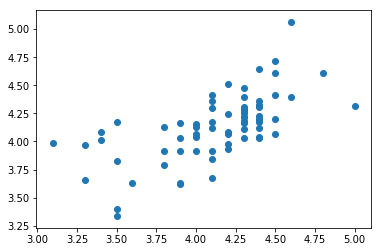

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred=lr.predict(x_test)
plt.scatter(y_test, pred)

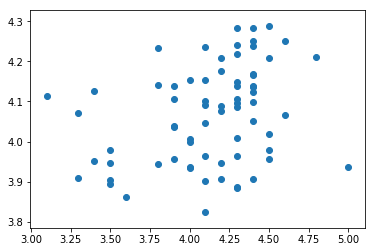

In [41]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(50,weights='distance')
knn.fit(x_train, y_train)
pred=knn.predict(x_test)
plt.scatter(y_test, pred)

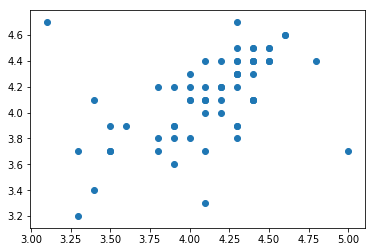

In [42]:
from sklearn.tree import ExtraTreeRegressor
er = ExtraTreeRegressor()
er.fit(x_train, y_train)
pred=er.predict(x_test)
plt.scatter(y_test, pred)